# MNIST classification using CNN

## Importing libraries

In [55]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

## Data Preprocessing

### Training Image preprocessing

In [56]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [57]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Normalize and add channel dimension
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0  

In [58]:
# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

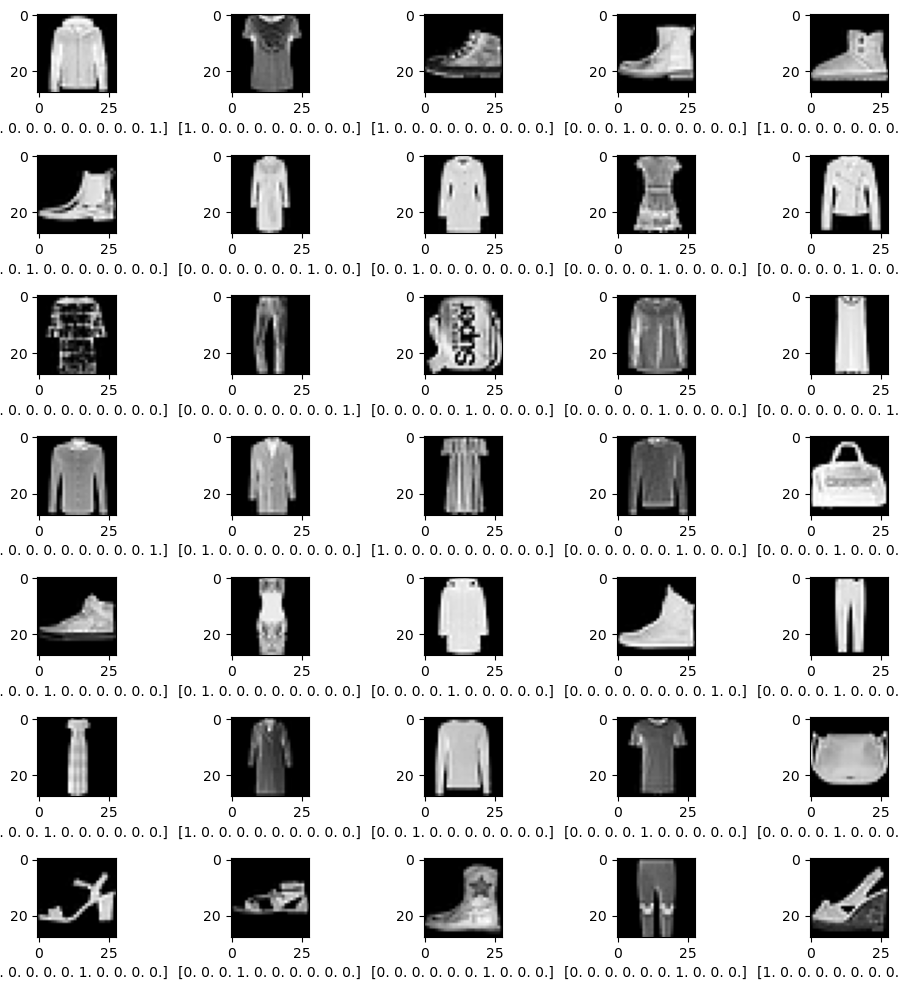

In [59]:
plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(7,5,i+1)
    plt.imshow(x_tarin[i],cmap='gray')
    plt.xlabel(y_train[i])
    plt.grid(False)
plt.tight_layout() 
plt.show()

## Building Model

In [62]:
cnn = Sequential()

### Building Convolution Layer

In [63]:
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))  # Output: (14, 14, 32)

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))  # Output: (7, 7, 64)

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))  # Output: (3, 3, 128)

cnn.add(Dropout(0.25))
cnn.add(Flatten())  # Output: 3 * 3 * 128 = 1152
cnn.add(Dense(units=256, activation='relu'))
cnn.add(Dropout(0.4))

# Output layer
cnn.add(Dense(units=10, activation='softmax'))


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling and Training Phase

In [64]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [65]:
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 584,170 (2.23 MB)

 Trainable params: 584,170 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

## Training Model


In [66]:
history = cnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.7307 - loss: 0.7292 - val_accuracy: 0.8855 - val_loss: 0.3088
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8874 - loss: 0.3037 - val_accuracy: 0.9086 - val_loss: 0.2532
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9101 - loss: 0.2451 - val_accuracy: 0.9134 - val_loss: 0.2448
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9215 - loss: 0.2150 - val_accuracy: 0.9192 - val_loss: 0.2226
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9297 - loss: 0.1935 - val_accuracy: 0.9218 - val_loss: 0.2153
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9366 - loss: 0.1745 - val_accuracy: 0.9237 - val_loss: 0.2099
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9389 - loss: 0.1634 - val_accuracy: 0.9271 - val_loss: 0.2195
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9459 - loss: 0.1459 - 

## Evaluating Model

In [67]:
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9268 - loss: 0.2276
Test Accuracy: 0.9288


### Saving Model

In [68]:
cnn.save('MNIST classification_model.h5')

## Accuracy Visualization

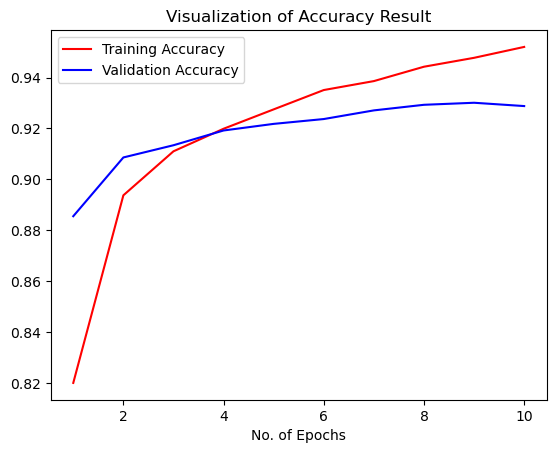

In [69]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()